In [14]:
# Importing the libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from apyori import apriori
import math
import warnings
warnings.filterwarnings("ignore")

In [15]:
## Load data and display the first 7 rows of the table.
dataset = pd.read_csv('store_data.csv',header=None)
dataset.head(7)

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19
0,shrimp,almonds,avocado,vegetables mix,green grapes,whole weat flour,yams,cottage cheese,energy drink,tomato juice,low fat yogurt,green tea,honey,salad,mineral water,salmon,antioxydant juice,frozen smoothie,spinach,olive oil
1,burgers,meatballs,eggs,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,chutney,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,turkey,avocado,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,mineral water,milk,energy bar,whole wheat rice,green tea,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,low fat yogurt,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,whole wheat pasta,french fries,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [16]:
## How many products is purchased during the week the data was recorded? 
# creating a list of dataframe columns 
columns = list(dataset)
ilist = []
for i in columns: 
    list_item = dataset[i].tolist()
    ilist.extend(list_item)
    # Remove 'NaN' items from list 
ilist[:] = (value for value in ilist if value != 'NaN')
print ("Number of Products Purchased =", len(ilist))

Number of Products Purchased = 150020


In [17]:
#Count the number of unique products in the store and compute the number of rules that can be generated 
s = pd.Series(ilist)
print ("Number of Unique Products are = ", s.nunique())
print ("List of Unique Products =", s.unique())

Number of Unique Products are =  120
List of Unique Products = ['shrimp' 'burgers' 'chutney' 'turkey' 'mineral water' 'low fat yogurt'
 'whole wheat pasta' 'soup' 'frozen vegetables' 'french fries' 'eggs'
 'cookies' 'spaghetti' 'meatballs' 'red wine' 'rice' 'parmesan cheese'
 'ground beef' 'sparkling water' 'herb & pepper' 'pickles' 'energy bar'
 'fresh tuna' 'escalope' 'avocado' 'tomato sauce' 'clothes accessories'
 'energy drink' 'chocolate' 'grated cheese' 'yogurt cake' 'mint'
 'asparagus' 'champagne' 'ham' 'muffins' 'french wine' 'chicken' 'pasta'
 'tomatoes' 'pancakes' 'frozen smoothie' 'carrots' 'yams' 'shallot'
 'butter' 'light mayo' 'pepper' 'candy bars' 'cooking oil' 'milk'
 'green tea' 'bug spray' 'oil' 'olive oil' 'salmon' 'cake' 'almonds'
 'salt' 'strong cheese' 'hot dogs' 'pet food' 'whole wheat rice'
 'antioxydant juice' 'honey' 'sandwich' 'salad' 'magazines' 'protein bar'
 'mayonnaise' 'cider' 'burger sauce' 'green grapes' 'vegetables mix'
 'bramble' 'nonfat milk' 'tomat

In [18]:
#if we proceed by brute force approach?
#number of association-rules with brute force approach
print ("Number of Association-Rules = ", math.pow(2,s.nunique()) - math.pow(1,(s.nunique()+1)) + 1)

Number of Association-Rules =  1.329227995784916e+36


In [19]:
# Sort the data proportionally to the number of items in each transaction (largest transactions first).
dataset['count']=dataset.count(axis=1)
dataset = dataset.sort_values(by=['count'],ascending=False)
print('Sorted data according to the number of products')
dataset.head()

Sorted data according to the number of products


,0,1,2,3,4,5,6,7,8,9,...,11,12,13,14,15,16,17,18,19,count
0,shrimp,almonds,avocado,vegetables mix,green grapes,whole weat flour,yams,cottage cheese,energy drink,tomato juice,...,green tea,honey,salad,mineral water,salmon,antioxydant juice,frozen smoothie,spinach,olive oil,20
1120,fresh tuna,avocado,vegetables mix,green grapes,honey,whole weat flour,french fries,cottage cheese,energy drink,tomato juice,...,green tea,oil,mineral water,salmon,antioxydant juice,frozen smoothie,spinach,cereals,NaN,19
1111,fresh tuna,frozen vegetables,parmesan cheese,pepper,spaghetti,milk,olive oil,black tea,almonds,salmon,...,cake,gums,oil,cereals,chocolate,frozen smoothie,protein bar,mayonnaise,NaN,19
1623,burgers,fresh tuna,ham,grated cheese,frozen vegetables,tomatoes,parmesan cheese,spaghetti,mineral water,chocolate,...,vegetables mix,nonfat milk,muffins,pancakes,cake,french fries,protein bar,NaN,NaN,18
1604,dessert wine,grated cheese,shrimp,frozen vegetables,ground beef,spaghetti,mineral water,soup,avocado,milk,...,whole wheat rice,gums,oil,clothes accessories,frozen smoothie,NaN,NaN,NaN,NaN,16


In [20]:
dataset.drop("count", axis=1,inplace = True)
# Add Column to indicate number of NULL items in each row
dataset['NaN-Count'] = dataset.isnull().sum(axis=1)
# Sort the data-frame with max non-NULL items in each row. Each row represents a transaction
dataset = dataset.sort_values(by=['NaN-Count'])
dataset.drop("NaN-Count", axis=1,inplace = True)

In [21]:
# 3. Reshaping the data: The Apyori library we are using requires our dataset to be in the form of a list of lists.
#The whole dataset should be a large list including all the transaction lists. If you used pandas to load the dataset,
#then your current form of data is a pandas dataframe and you should convert it to list of lists%%timeit
## Algorithm expects a List and list of lists to work with.
transactions = [] ## This is the super list or big list

for i in range(0, 7500): ## Going through each row
    transactions.append([str(dataset.values[i,j]) for j in range(0, 19)]) ## str= set all the products to Strings 
print (len(transactions))
print (transactions)

7500
[['shrimp', 'almonds', 'avocado', 'vegetables mix', 'green grapes', 'whole weat flour', 'yams', 'cottage cheese', 'energy drink', 'tomato juice', 'low fat yogurt', 'green tea', 'honey', 'salad', 'mineral water', 'salmon', 'antioxydant juice', 'frozen smoothie', 'spinach'], ['fresh tuna', 'avocado', 'vegetables mix', 'green grapes', 'honey', 'whole weat flour', 'french fries', 'cottage cheese', 'energy drink', 'tomato juice', 'low fat yogurt', 'green tea', 'oil', 'mineral water', 'salmon', 'antioxydant juice', 'frozen smoothie', 'spinach', 'cereals'], ['fresh tuna', 'frozen vegetables', 'parmesan cheese', 'pepper', 'spaghetti', 'milk', 'olive oil', 'black tea', 'almonds', 'salmon', 'honey', 'cake', 'gums', 'oil', 'cereals', 'chocolate', 'frozen smoothie', 'protein bar', 'mayonnaise'], ['burgers', 'fresh tuna', 'ham', 'grated cheese', 'frozen vegetables', 'tomatoes', 'parmesan cheese', 'spaghetti', 'mineral water', 'chocolate', 'olive oil', 'vegetables mix', 'nonfat milk', 'muffins'

In [22]:
# 4. We are only interested in finding rules for the items that have certain minimum occurence (e.g. support) 
#and have a minimum value for co-occurrence with other items (e.g. confidence). 
#The first task is therefore to make a good strategy for setting optimal minimum values for support and confidence.
#Try to argue your strategy.
rules = apriori(transactions, min_support = 0.003, min_confidence = 0.2, min_lift = 3, min_length = 2) 

In [23]:
# 5. Generate the frequent itemsets and the rules considering the obtained support and confidence thresholds.
# Visualising the results
rules_lst = list(rules)

In [24]:
# 6. Display the generated rules. How many they are? Try to analyze these associations.
print ("Number of Rules =", len(rules_lst))
rules_lst

Number of Rules = 160


[RelationRecord(items=frozenset({'light cream', 'chicken'}), support=0.004533333333333334, ordered_statistics=[OrderedStatistic(items_base=frozenset({'light cream'}), items_add=frozenset({'chicken'}), confidence=0.2905982905982906, lift=4.843304843304844)]),
 RelationRecord(items=frozenset({'escalope', 'mushroom cream sauce'}), support=0.005733333333333333, ordered_statistics=[OrderedStatistic(items_base=frozenset({'mushroom cream sauce'}), items_add=frozenset({'escalope'}), confidence=0.30069930069930073, lift=3.7903273197390845)]),
 RelationRecord(items=frozenset({'escalope', 'pasta'}), support=0.005866666666666667, ordered_statistics=[OrderedStatistic(items_base=frozenset({'pasta'}), items_add=frozenset({'escalope'}), confidence=0.37288135593220345, lift=4.700185158809287)]),
 RelationRecord(items=frozenset({'honey', 'fromage blanc'}), support=0.0033333333333333335, ordered_statistics=[OrderedStatistic(items_base=frozenset({'fromage blanc'}), items_add=frozenset({'honey'}), confiden

In [25]:
# 7. Before visualizing the results, display the rules in a more clear way; in a table showing the support,
#the confidence, and lift for each rule.
ord_stat = rules_lst[0][2]
ord_stat[0].items_add
def get_frozenset_elements(frozen_set):
    frozenset_list = []
    for i in frozen_set:
        frozenset_list.append(i)
    return frozenset_list

list_ = get_frozenset_elements(ord_stat[0].items_base)
list_
# Function to convert   
def listToString(s):  
    # initialize an empty string 
    str1 = " " 
    # return string   
    return (str1.join(s)) 
# convert the rules into a list 
listRules = [list(rules_lst[i][0]) for i in range(0,len(rules_lst))]
listRules[0]
# go through the rules and the corresponding support, confidence, list. Add them into a list 
lst = []
for i in range(0,len(rules_lst)):
    dict_item = {}
    #rules
    dict_item.update({'rule': listToString(listRules[i])})
    #support
    dict_item.update({'support': str(rules_lst[i][1])})
    #confidence & lift 
    ord_stat = rules_lst[i][2]
    dict_item.update({'confidence': str(ord_stat[0].confidence)})
    dict_item.update({'lift': str(ord_stat[0].lift)})
    #print (dict_item)
    #df_rules.append(pd.Series(dict_item), ignore_index=True)
    lst.append(dict_item)
# Creating an dataframe from the list, so that it can be shown in table format 
df_rules =  pd.DataFrame(lst)
df_rules.head()

,rule,support,confidence,lift
0,light cream chicken,0.004533333333333334,0.2905982905982906,4.843304843304844
1,escalope mushroom cream sauce,0.005733333333333333,0.30069930069930073,3.7903273197390845
2,escalope pasta,0.005866666666666667,0.37288135593220345,4.700185158809287
3,honey fromage blanc,0.0033333333333333335,0.2450980392156863,5.163582286847324
4,ground beef herb & pepper,0.016,0.3234501347708895,3.2915549671393096


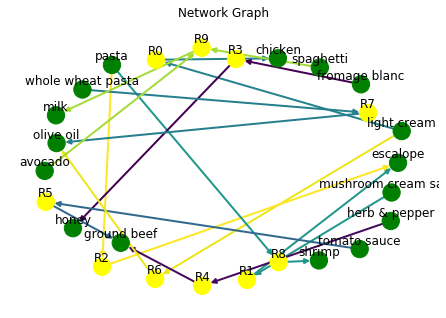

In [ ]:
# 8. We can visualize rulesets as graphs, with items as nodes and connections as arcs between them. 
#This help to find interesting (subjective) patterns from the data. To achieve this goal,
#use NetworkXpython library.
### Network Graph
def draw_network_graph(rules, rules_to_show):
    import networkx as nx  
    G1 = nx.DiGraph()
   
    color_map=[]
    N = 50
    colors = np.random.rand(N)    
    strs=['R0', 'R1', 'R2', 'R3', 'R4', 'R5', 'R6', 'R7', 'R8', 'R9', 'R10', 'R11']   
   
   
    for i in range (rules_to_show):      
        G1.add_nodes_from(["R"+str(i)])

        ord_stat = rules_lst[i][2]
        antecedants = get_frozenset_elements(ord_stat[0].items_base)
        #print ("Antecedents=", antecedants)
        
        for a in antecedants:
            G1.add_nodes_from([a])
            G1.add_edge(a, "R"+str(i), color=colors[i] , weight = 2)

        item_stat = rules_lst[i][2]
        consequents = get_frozenset_elements(item_stat[0].items_add)
        #print ("Cntecedents=", consequents)
    
        for c in consequents:
            G1.add_nodes_from([c])
            G1.add_edge("R"+str(i), c, color=colors[i],  weight=2)
 
    for node in G1:
        found_a_string = False
        for item in strs: 
            if node==item:
                found_a_string = True
        if found_a_string:
            color_map.append('yellow')
        else:
            color_map.append('green')       

   
    edges = G1.edges()
    colors = [G1[u][v]['color'] for u,v in edges]
    weights = [G1[u][v]['weight'] for u,v in edges]
 
    pos = nx.spring_layout(G1, k=16, scale=1)
    nx.draw(G1, pos, edges=edges, node_color = color_map, edge_color=colors, width=weights, font_size=16, with_labels=False)            
   
    for p in pos:  # raise text positions
        pos[p][1] += 0.07
    nx.draw_networkx_labels(G1, pos)
    plt.title('Network Graph')
    plt.show()
    # Draw for 10 rules to show the antecedents and consequents 
draw_network_graph (rules_lst, 10)

In [ ]:
# 10. Apply the algorithm apriroi and fp-growth implemented in frequent_patterns library. Then,
#find the time spent to generate the rules by the two apriori implementations and fp-growth.
#Based on these runtimes, compare the effectiveness and complexity of the two algorithms.
from mlxtend.frequent_patterns import fpgrowth
from mlxtend.preprocessing import TransactionEncoder
from mlxtend.frequent_patterns import apriori as apriori1

te = TransactionEncoder()
te_ary = te.fit(transactions).transform(transactions)
df = pd.DataFrame(te_ary, columns=te.columns_)

%timeit -n 100 -r 10 apriori1(df, min_support=0.003)

%timeit -n 100 -r 10 fpgrowth(df, min_support=0.003)